<style type="text/css">
    ol { list-style-type: upper-alpha; }
    p { text-align: center; font-weight: bold; }
</style>

<center>
  <img src=https://i.imgur.com/0TSSaqL.png width="550">
</center>
<center>
  <h3>
    <b>CAPSTONE</b><br/>
    <b>Predict H1N1 and Seasonal Flu Vaccines</b><br/>
    <b>GRUPO 3 - Modeling</b>
  </h3>
</center>

# Contexto

El objetivo es predecir si una persona fue vacunada con la vacuna H1N1 o gripe estacional, de acuerdo a información compartida acerca de su contexto, opiniones y comportamientos a nivel salud.

Después de la fase de EDA (Exploratory Data Analysis), nos quedamos con 32 de las 36 características iniciales:

For all binary variables: 0 = No; 1 = Yes.

*   `h1n1_concern` - Level of concern about the H1N1 flu.
  *   0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
*   `h1n1_knowledge` - Level of knowledge about H1N1 flu.
  *   0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
*   `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
*   `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
*   `behavioral_face_mask` - Has bought a face mask. (binary)
*   `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
*   `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
*   `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
*   `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
*   `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
*   `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
*   `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
*   `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
*   `health_worker` - Is a healthcare worker. (binary)
*   `health_insurance` - Has health insurance. (binary)
*   `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
  *   1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
     1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `age_group` - Age group of respondent.
*   `education` - Self-reported education level.
*   `race` - Race of respondent.
*   `sex` - Sex of respondent.
*   `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
*   `marital_status` - Marital status of respondent.
*   `rent_or_own` - Housing situation of respondent.
*   `employment_status` - Employment status of respondent.
*   `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
*   `household_adults` - Number of other adults in household, top-coded to 3.
*   `household_children` - Number of children in household, top-coded to 3.

# 1. Preparación

En esta fase vamos a cargar y preparar el dataset resultante de la fase de EDA (Exploratory Data Analysis).

Primero importamos las librerías necesarias.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [80]:
def print_metrics(y_test, y_pred_result):
  print("Accuracy:", "{:10.4f}".format(accuracy_score(y_test, y_pred_result, normalize=True)))
  print("Precision:", "{:10.4f}".format(precision_score(y_test, y_pred_result)))
  print("Recall:", "{:10.4f}".format(recall_score(y_test, y_pred_result)))
  print("\n", classification_report(y_test, y_pred_result))

In [81]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
)

Cargamos el dataset y exploramos su estructura y datos.

In [82]:
features_df = pd.read_csv('training_set_features_eda_notnulls.csv', index_col="respondent_id")
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,age_group,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,1,3,0,1,0,1,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,3,1,1,1,0,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,3,1,1,0,0,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4,0,3,0,1,1,1,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2,3,3,0,0,0,0,0,1.0,0.0


El dataset tiene 26707 filas y 32 columnas.

In [83]:
features_df.shape

(26707, 31)

Tipos de datos por columna:

In [84]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int64
education                        int64
race                             int64
sex                              int64
marital_status           

In [85]:
features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,age_group,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,2.186131,1.741117,2.570300,0.406223,0.439735,0.222002,0.491894,0.833489,0.887558,0.529599
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,1.457320,1.073989,0.923226,0.491136,0.496364,0.415600,0.598964,0.823313,0.749980,0.925264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000


In [86]:
labels_df = pd.read_csv("training_set_labels.csv", index_col="respondent_id")
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


# Split training y evaluation set

In [87]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

y_train_h1n1 = y_train[['h1n1_vaccine']].copy()
y_train_seasonal = y_train[['seasonal_vaccine']].copy()
y_eval_h1n1 = y_eval[['h1n1_vaccine']].copy()
y_eval_seasonal = y_eval[['seasonal_vaccine']].copy()

# 2. Hyperparameters tuning con GridSearchCV

## Naive Bayes

In [88]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train_h1n1)

print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.657933224657568)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train_seasonal)

print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.15199110829529336)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic Regression

In [90]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}

lr = LogisticRegression()
lrModel_grid = GridSearchCV(lr, param_grid, cv=5)
lrModel_grid.fit(X_train, y_train_h1n1)

print(lrModel_grid.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

LogisticRegression(C=0.1)


In [91]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}

lr = LogisticRegression()
lrModel_grid = GridSearchCV(lr, param_grid, cv=5)
lrModel_grid.fit(X_train, y_train_seasonal)

print(lrModel_grid.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

LogisticRegression(C=0.1)


## SVM

In [92]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
#grid.fit(X_train, y_train_h1n1)

# print best parameter after tuning
#print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

In [93]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
#grid.fit(X_train, y_train_seasonal)

# print best parameter after tuning
#print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

# 3. Logistic Regression

In [94]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'age_group' 'education'
 'race' 'sex' 'marital_status' 'rent_or_own' 'employment_status'
 'census_msa' 'household_adults' 'household_children']


In [95]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [96]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=0.1)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 'employment_status',
       'census_msa', 'household_adults', 'household_children'],
      dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=0.1)))])

In [97]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_lg = full_pipeline.predict_proba(X_eval)
preds_lg

[array([[0.80589845, 0.19410155],
        [0.96174158, 0.03825842],
        [0.90137172, 0.09862828],
        ...,
        [0.96784367, 0.03215633],
        [0.95338124, 0.04661876],
        [0.91965345, 0.08034655]]),
 array([[0.64984803, 0.35015197],
        [0.65603952, 0.34396048],
        [0.32372469, 0.67627531],
        ...,
        [0.88314418, 0.11685582],
        [0.90819755, 0.09180245],
        [0.13614002, 0.86385998]])]

In [98]:
preds_lg[1][:, 1]

array([0.35015197, 0.34396048, 0.67627531, ..., 0.11685582, 0.09180245,
       0.86385998])

In [99]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lg[0][:, 1].round())

Accuracy:     0.8463
Precision:     0.6969
Recall:     0.4888

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      6942
           1       0.70      0.49      0.57      1872

    accuracy                           0.85      8814
   macro avg       0.78      0.72      0.74      8814
weighted avg       0.84      0.85      0.84      8814



In [100]:
print_metrics(y_eval_seasonal, preds_lg[0][:, 1].round())

Accuracy:     0.6207
Precision:     0.7898
Recall:     0.2527

               precision    recall  f1-score   support

           0       0.59      0.94      0.73      4710
           1       0.79      0.25      0.38      4104

    accuracy                           0.62      8814
   macro avg       0.69      0.60      0.55      8814
weighted avg       0.68      0.62      0.57      8814



In [101]:
y_preds_lg = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lg[0][:, 1],
        "seasonal_vaccine": preds_lg[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_lg.shape)
y_preds_lg.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.194102,0.350152
16516,0.038258,0.343960
3106,0.098628,0.676275
16981,0.777108,0.908881
19111,0.190333,0.749137


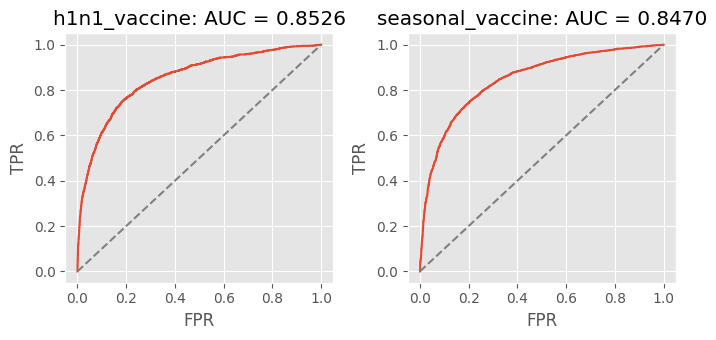

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lg['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_lg['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

# 4. Naive Bayes

In [103]:
estimators = MultiOutputClassifier(
    estimator=GaussianNB(var_smoothing=0.15199110829529336)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 'employment_status',
       'census_msa', 'household_adults', 'household_children'],
      dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=GaussianNB(var_smoothing=0.15199110829529336)))])

In [104]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_naive = full_pipeline.predict_proba(X_eval)
preds_naive

[array([[6.45824203e-01, 3.54175797e-01],
        [9.99165969e-01, 8.34030577e-04],
        [9.98334391e-01, 1.66560908e-03],
        ...,
        [9.81536961e-01, 1.84630390e-02],
        [9.98895126e-01, 1.10487353e-03],
        [9.80573416e-01, 1.94265844e-02]]),
 array([[0.26812123, 0.73187877],
        [0.95742153, 0.04257847],
        [0.94568681, 0.05431319],
        ...,
        [0.89396094, 0.10603906],
        [0.99713066, 0.00286934],
        [0.36268983, 0.63731017]])]

In [105]:
print_metrics(y_eval_h1n1, preds_naive[0][:, 1].round())

Accuracy:     0.7891
Precision:     0.5028
Recall:     0.6165

               precision    recall  f1-score   support

           0       0.89      0.84      0.86      6942
           1       0.50      0.62      0.55      1872

    accuracy                           0.79      8814
   macro avg       0.70      0.73      0.71      8814
weighted avg       0.81      0.79      0.80      8814



In [106]:
print_metrics(y_eval_seasonal, preds_naive[0][:, 1].round())

Accuracy:     0.6591
Precision:     0.7394
Recall:     0.4135

               precision    recall  f1-score   support

           0       0.63      0.87      0.73      4710
           1       0.74      0.41      0.53      4104

    accuracy                           0.66      8814
   macro avg       0.69      0.64      0.63      8814
weighted avg       0.68      0.66      0.64      8814



In [107]:
y_preds_naive = pd.DataFrame(
    {
        "h1n1_vaccine": preds_naive[0][:, 1],
        "seasonal_vaccine": preds_naive[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_naive.shape)
y_preds_naive.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.354176,0.731879
16516,0.000834,0.042578
3106,0.001666,0.054313
16981,0.991942,0.998519
19111,0.184053,0.690681


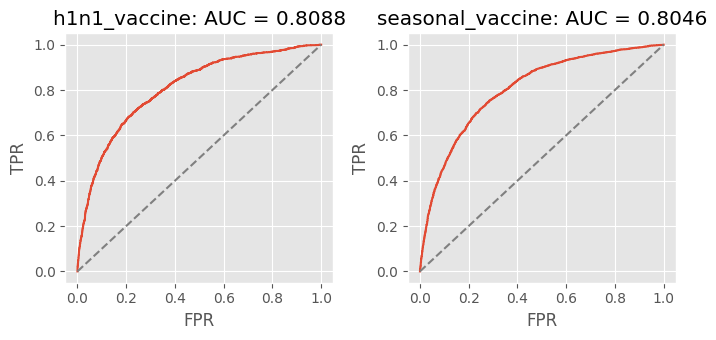

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_naive['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_naive['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

# 5. SVM

In [112]:
estimators = MultiOutputClassifier(
    estimator=SVC(C=0.1, kernel='rbf', gamma=0.1, probability=True)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'marital_status', 'rent_or_own', 'employment_status',
       'census_msa', 'household_adults', 'household_children'],
      dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=SVC(C=0.1, gamma=0.1,
                                                     probability=True)))])

In [113]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_svm = full_pipeline.predict_proba(X_eval)
preds_svm

[array([[0.82564458, 0.17435542],
        [0.87321404, 0.12678596],
        [0.86887048, 0.13112952],
        ...,
        [0.89881693, 0.10118307],
        [0.85445623, 0.14554377],
        [0.89663687, 0.10336313]]),
 array([[0.57112527, 0.42887473],
        [0.60895194, 0.39104806],
        [0.49402576, 0.50597424],
        ...,
        [0.93201198, 0.06798802],
        [0.83965793, 0.16034207],
        [0.09432587, 0.90567413]])]

In [114]:
print_metrics(y_eval_h1n1, preds_svm[0][:, 1].round())

Accuracy:     0.8322
Precision:     0.7024
Recall:     0.3643

               precision    recall  f1-score   support

           0       0.85      0.96      0.90      6942
           1       0.70      0.36      0.48      1872

    accuracy                           0.83      8814
   macro avg       0.78      0.66      0.69      8814
weighted avg       0.82      0.83      0.81      8814



In [115]:
print_metrics(y_eval_seasonal, preds_svm[0][:, 1].round())

Accuracy:     0.6121
Precision:     0.8527
Recall:     0.2018

               precision    recall  f1-score   support

           0       0.58      0.97      0.73      4710
           1       0.85      0.20      0.33      4104

    accuracy                           0.61      8814
   macro avg       0.72      0.59      0.53      8814
weighted avg       0.71      0.61      0.54      8814



In [116]:
y_preds_svm = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svm[0][:, 1],
        "seasonal_vaccine": preds_svm[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_svm.shape)
y_preds_svm.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.174355,0.428875
16516,0.126786,0.391048
3106,0.131130,0.505974
16981,0.678956,0.776688
19111,0.126442,0.874831


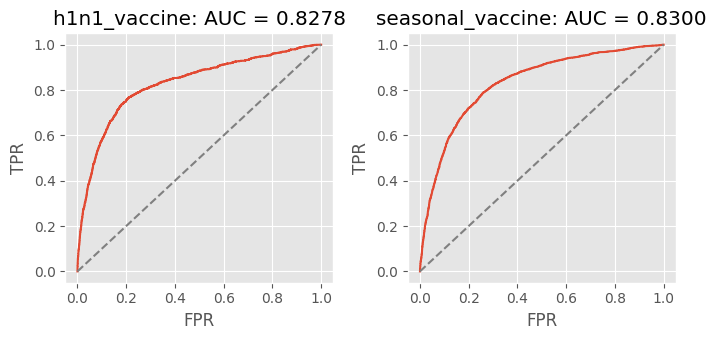

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svm['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_svm['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()